# Exploratory Analysis

In this notebook, we will explore the dataset of our spam classification problem and try to find interesting information.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats


### Import the data

In [3]:
df = pd.read_csv("Spam Email raw text for NLP.csv")
df.drop('FILE_NAME', axis=1, inplace=True)
df['CATEGORY'] = df['CATEGORY'].replace({1: 'Spam', 0: 'Non Spam'})
print(f"Shape: {df.shape}")
df.head()

Shape: (5796, 2)


,CATEGORY,MESSAGE
0,Spam,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,Spam,ATTENTION: This is a MUST for ALL Computer Use...
2,Spam,This is a multi-part message in MIME format.\n...
3,Spam,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,Spam,This is the bottom line. If you can GIVE AWAY...


### First exploration of the dataset

In [4]:
df.describe()

,CATEGORY,MESSAGE
count,5796,5796
unique,2,5625
top,Non Spam,\n\nHello I am your hot lil horny toy.\n\n ...
freq,3900,7


In [5]:
df_category_0 = df[df['CATEGORY'] == "Non Spam"].head(5)
print(df_category_0)

df_category_1 = df[df['CATEGORY'] == "Spam"].head(5)
print(df_category_1)


      CATEGORY                                            MESSAGE
1896  Non Spam  \n\nIn a message dated 9/24/2002 11:24:58 AM, ...
1897  Non Spam  Hiya, I always seem to get errors when I do an...
1898  Non Spam  \n\nI don't know how one can expect better and...
1899  Non Spam  Tim Peters wrote:\n\n> I've run no experiments...
1900  Non Spam  At 10:34 AM -0700 on 8/28/02, Jim Whitehead wr...
  CATEGORY                                            MESSAGE
0     Spam  Dear Homeowner,\n\n \n\nInterest Rates are at ...
1     Spam  ATTENTION: This is a MUST for ALL Computer Use...
2     Spam  This is a multi-part message in MIME format.\n...
3     Spam  IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4     Spam  This is the bottom line.  If you can GIVE AWAY...


### Some plots to try to better understand the data

In [6]:
df['CATEGORY'].value_counts(normalize=True)
fig = px.histogram(df['CATEGORY'], x="CATEGORY", title='Spam distribution', color='CATEGORY', text_auto=True)
fig.show()

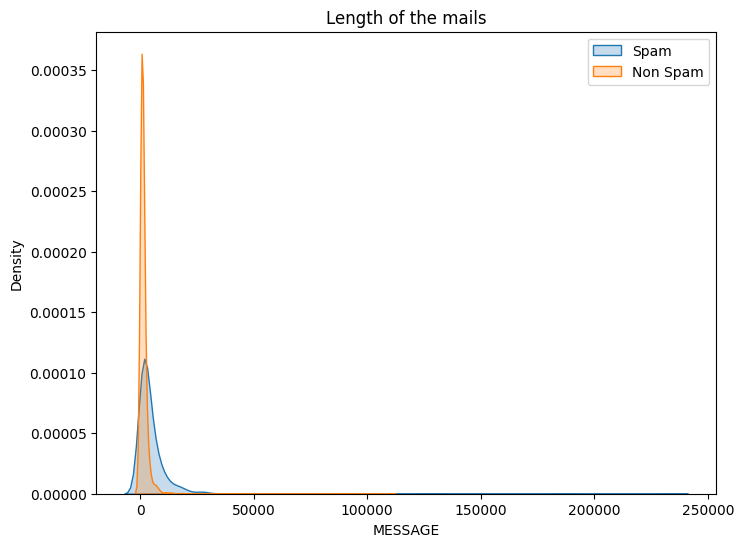

In [7]:
plt.figure(figsize=(8,6))

for category in df['CATEGORY'].unique():
    sns.kdeplot(df[df['CATEGORY'] == category]['MESSAGE'].str.len(), label= category, fill=True)

plt.legend()

plt.title("Length of the mails")
plt.show()

Let's do the same graph but dropping the 5% shorter and longer mail so we can have a better visibility on the mean length of the mails

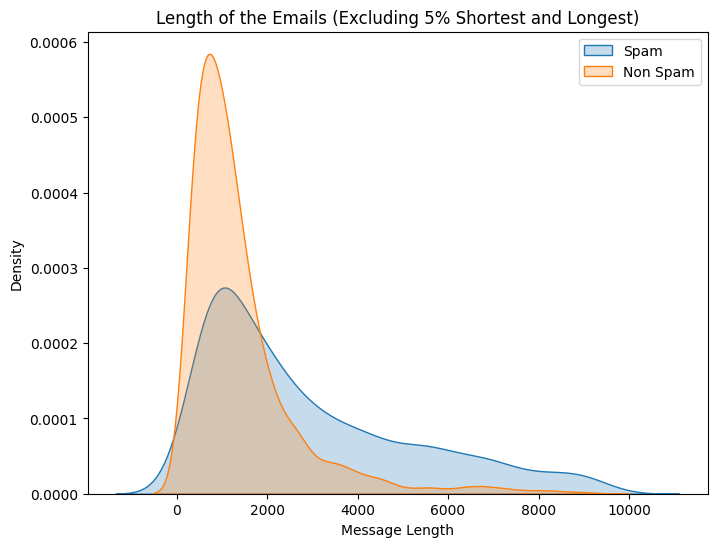

In [8]:

# Define the shorter and longer mails (5%)
shorter_mails = stats.scoreatpercentile(df['MESSAGE'].str.len(), 5)
longer_mails = stats.scoreatpercentile(df['MESSAGE'].str.len(), 95)
# Exclude these mails
filtered_df = df[(df['MESSAGE'].str.len() > shorter_mails) & (df['MESSAGE'].str.len() < longer_mails)]

plt.figure(figsize=(8, 6))

for category in filtered_df['CATEGORY'].unique():
    sns.kdeplot(filtered_df[filtered_df['CATEGORY'] == category]['MESSAGE'].str.len(), label=category, fill=True)

plt.legend()
plt.title("Length of the Emails (Excluding 5% Shortest and Longest)")
plt.xlabel("Message Length")
plt.ylabel("Density")
plt.show()
